In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(4.0, 8.0)

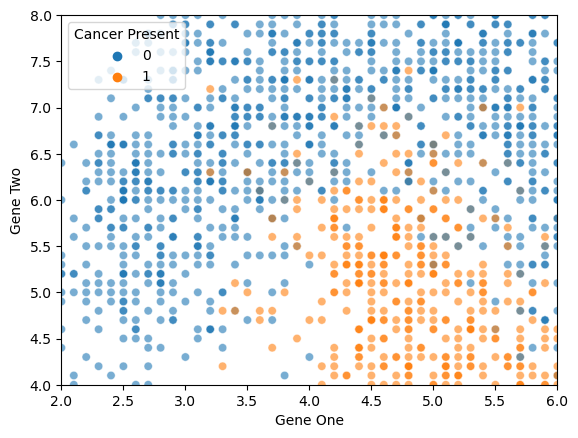

In [4]:
sns.scatterplot(data = df, x = "Gene One", y = "Gene Two", hue = "Cancer Present", alpha = 0.6)
plt.xlim(2,6)
plt.ylim(4,8)

In [5]:
len(df)

3000

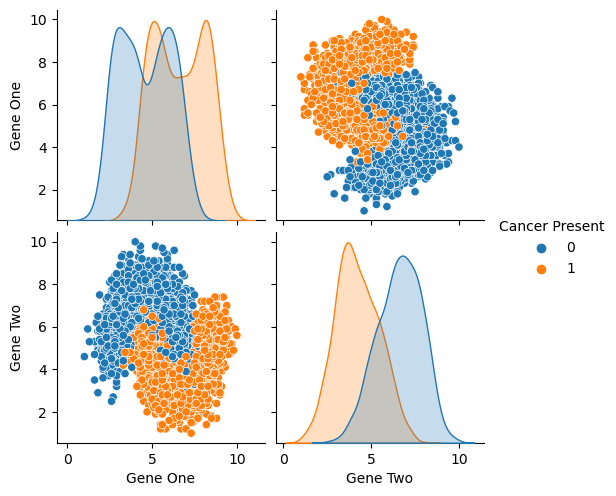

In [6]:
sns.pairplot(data = df, hue = "Cancer Present")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X = df.drop("Cancer Present", axis = 1)
y = df["Cancer Present"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaled_X_train = scaler.fit_transform(X_train)

In [13]:
scaled_X_test = scaler.fit_transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [16]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_pred = knn_model.predict(scaled_X_test)

C:\Users\blizk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 34, 396]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



In [21]:
from sklearn.metrics import accuracy_score
1- accuracy_score(y_test, y_pred)
test_error_rates = []

In [22]:
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1-accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)

C:\Users\blizk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\blizk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [23]:
test_error_rates

[0.08666666666666667,
 0.08333333333333337,
 0.07111111111111112,
 0.06999999999999995,
 0.06555555555555559,
 0.06666666666666665,
 0.06555555555555559,
 0.06666666666666665,
 0.06444444444444442,
 0.06777777777777783,
 0.07111111111111112,
 0.06555555555555559,
 0.06999999999999995,
 0.06555555555555559,
 0.06777777777777783,
 0.06666666666666665,
 0.06888888888888889,
 0.06555555555555559,
 0.06555555555555559,
 0.06333333333333335,
 0.06555555555555559,
 0.061111111111111116,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.061111111111111116,
 0.06222222222222218,
 0.061111111111111116,
 0.061111111111111116]

Text(0.5, 0, 'K Neigbor')

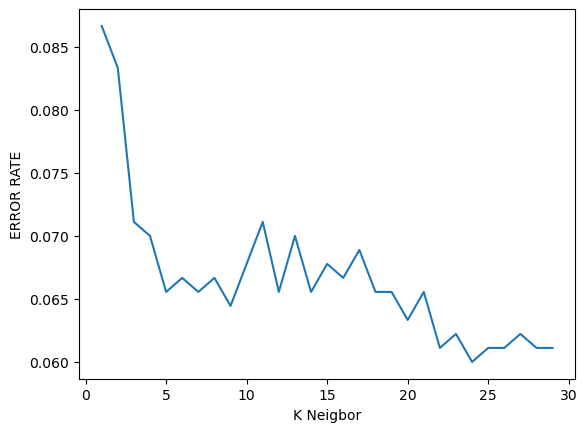

In [24]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel("ERROR RATE")
plt.xlabel("K Neigbor")

In [25]:
scaler = StandardScaler()

In [26]:
knn = KNeighborsClassifier()

In [27]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [28]:
operations = [("scaler", scaler), ("knn", knn)]

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline(operations)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
k_values = list(range(1,20))

In [33]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [34]:
param_grid = {"knn__n_neighbors": k_values}

In [35]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv = 5, scoring = "accuracy")

In [36]:
full_cv_classifier.fit(X_train, y_train)

C:\Users\blizk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\blizk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [37]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [38]:
full_pred = full_cv_classifier.predict(X_test)

C:\Users\blizk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [40]:
new_patient = [[3.8, 6.4]]

In [41]:
full_cv_classifier.predict_proba(new_patient)

C:\Users\blizk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [42]:
full_cv_classifier.predict(new_patient)

C:\Users\blizk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\blizk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0], dtype=int64)